In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
X_train  = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
y_train  = pd.read_csv('./Training Data/Diabetes_YTrain.csv')
X_result = pd.read_csv("Untitled.csv")

X_train  = X_train.values
y_train  = y_train.values
X_result = X_result.values 

In [42]:
# splitting data
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2)

# scaling data
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test   = sc.transform(X_test)
X_result = sc.transform(X_result)

In [9]:
class kNN_classifier:
    
    def __init__(self,k):
        self.k = k
        
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def dist(self,x,y):
        d=np.sqrt(((x-y)**2).sum())
        return d
    
    def predict(self,p):
        
        distances = [] 
        
        for i in range(len(self.X)):
            d = self.dist(self.X[i],p)
            distances.append((d,self.y[i][0]))
        
        distances = sorted(distances)
        vals = distances[:self.k]
        classes = []
        
        for dist,i in vals:
            classes.append(i)
            
        class_,counts = np.unique(classes,return_counts=True)
        ix = np.argmax(counts)
        pred = {"class":class_[ix],"prob":np.max(counts)/np.sum(counts)}
        return pred
        

In [54]:
x_axis = []
y_axis = []
for k_ in range(1,len(X_train),2):
    knn_model = kNN_classifier(k_)
    knn_model.fit(X_train,y_train)
    
    predictions = []
    
    for i in range(len(X_test)):
        predictions.append(knn_model.predict(X_test[i])["class"])
    x_axis.append(k_)
    y_axis.append(np.mean(predictions == ytest))
#     print(k_,)

In [94]:
np.unique(y_test,return_counts = True)

(array([0, 1]), array([65, 51]))

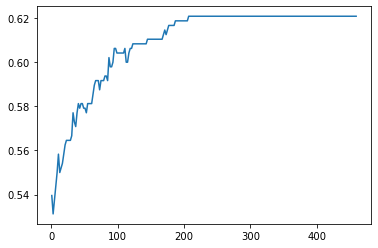

In [85]:
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)

In [91]:
knn_model = kNN_classifier(5)
knn_model.fit(X_train,y_train)
predictions = []
for i in range(len(X_result)):
    predictions.append(knn_model.predict(X_result[i])["class"])


In [96]:
np.unique(predictions,return_counts = True)

(array([0, 1]), array([140,  52]))

In [92]:
with open("result.csv",'w',encoding = 'utf-8') as f:
    f.write("Outcome\n")
    for p in predictions:
        f.write(str(p)+"\n")

In [97]:
dataset = pd.read_csv("result.csv")
dataset

Outcome
0          1
1          0
2          0
3          0
4          0
..       ...
187        0
188        0
189        1
190        0
191        0

[192 rows x 1 columns]